# Module 1 Capstone Project

## Introduction
- Briefly describe your project’s goal (e.g., "Analyzing IMDb Top 250 Movies to identify trends in ratings and genres").
- Mention your data source (e.g., "Data scraped from IMDb" or "Kaggle dataset: [link]").

## Objectives
- List the questions you aim to answer (e.g., "How do movie ratings vary by genre?").

## Data Collection
- Explain how you obtained the data (e.g., web scraping, Kaggle).
- Include a code snippet showing data loading (e.g., `pd.read_csv()`).

## Data Cleaning & Preprocessing
- Document steps like handling missing values, converting data types, or filtering data.

## Analysis & Visualizations
- Break your analysis into subsections (e.g., "Rating Distribution," "Genre Trends").
- Add **headings**, **captions**, and **explanations** for each visualization.

## Conclusion
- Summarize key findings.
- Suggest future work (e.g., "Include box office revenue data for deeper insights").

In [ ]:
# import
!pip install requests
!pip install beautifulsoup4
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Scrape the top 250 movies from IMDb using Python's requests and BeautifulSoup libraries.

In [8]:
# URL of the mobile IMDb Top 250 movies page
url = "https://m.imdb.com/chart/top/"

# Send a GET request with headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract movie titles, years, and ratings
movies = soup.find_all('li', class_='ipc-metadata-list-summary-item')

data = []
for movie in movies:
    try:
        # Extract title and remove numbering
        title_element = movie.find('h3', class_='ipc-title__text')
        if title_element:
            title = title_element.text.strip().split('. ', 1)[-1]  # Remove "1. ", "2. " etc.
        else:
            title = 'N/A'

        # Extract year (updated class)
        year_element = movie.find('span', class_='cli-title-metadata-item')
        year = year_element.text.strip() if year_element else 'N/A'

        # Extract rating
        rating_element = movie.find('span', class_='ipc-rating-star')
        rating = rating_element.text.strip().split()[0] if rating_element else 'N/A'

        data.append([title, year, rating])
    except Exception as e:
        print(f"Error processing movie: {e}")

# Create DataFrame
df = pd.DataFrame(data, columns=['Title', 'Year', 'Rating'])

# Save to CSV
df.to_csv('imdb_top_250_movies.csv', index=False)
print("Data saved successfully!")
print(df.head())

Data saved successfully!
                      Title  Year Rating
0  The Shawshank Redemption  1994    9.3
1             The Godfather  1972    9.2
2           The Dark Knight  2008    9.0
3     The Godfather Part II  1974    9.0
4              12 Angry Men  1957    9.0


Analyze the scraped data and create visualizations to answer the following questions:

 * What is the distribution of movie ratings?

 * How many movies were released each year?

 * What are the top 10 highest-rated movies?

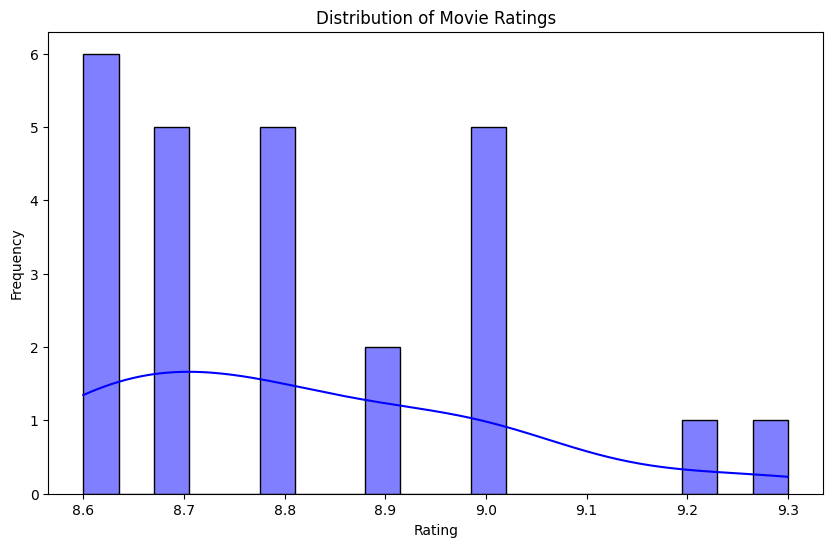

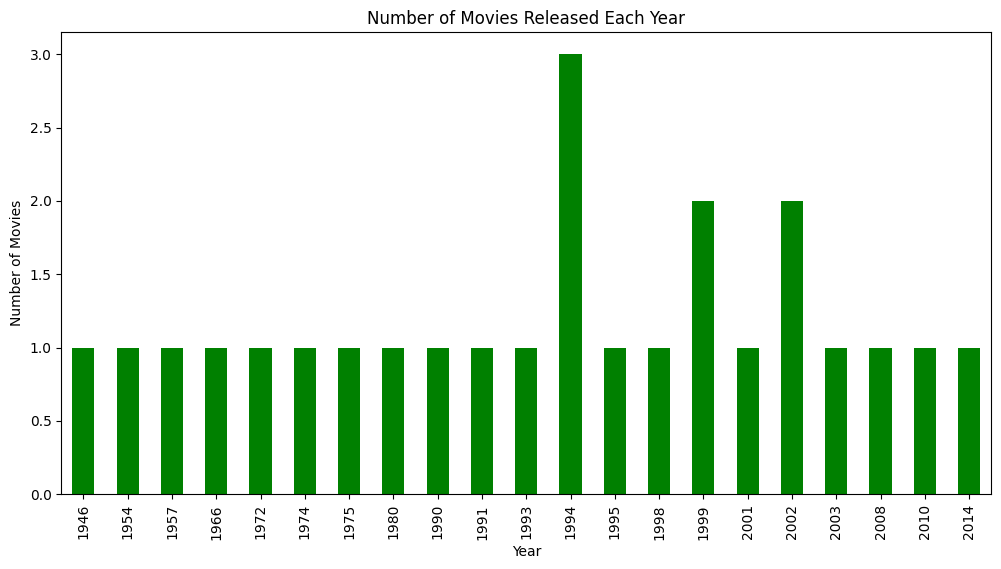

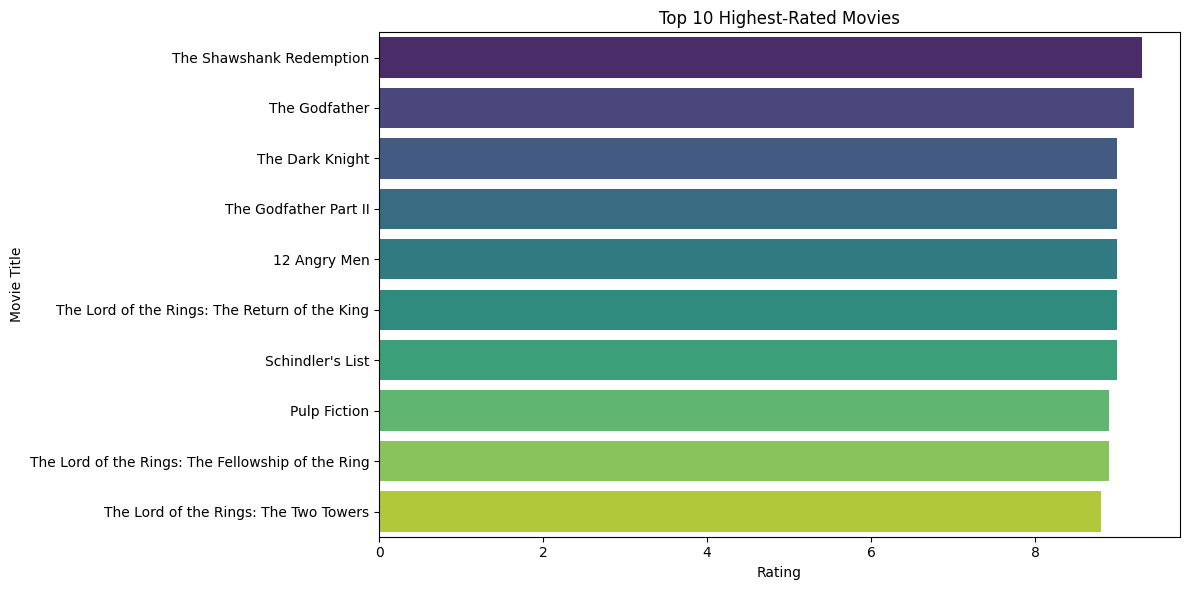

In [9]:
# Load the dataset
df = pd.read_csv('imdb_top_250_movies.csv')

# Convert 'Rating' and 'Year' to numeric
df['Rating'] = pd.to_numeric(df['Rating'])
df['Year'] = pd.to_numeric(df['Year'])

# 1. Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Number of movies released each year
plt.figure(figsize=(12, 6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# 3. Top 10 highest-rated movies (FIXED CODE)
top_10_movies = df.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Rating',
    y='Title',
    data=top_10_movies,
    hue='Title',  # Added hue parameter
    palette='viridis',
    legend=False  # Suppress legend
)
plt.title('Top 10 Highest-Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.tight_layout()  # Improve spacing
plt.show()